# USAID-Kenya-Sentiment-Analysis

### Extracting Data From X/Tweeter API (Tweepy)

In [1]:
!pip install --user tweepy



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import tweepy

# # Bearer token given

# # Initialize the Twitter client
# client = tweepy.Client(bearer_token=BEARER_TOKEN)

# # Query includes retweets, multiple keywords, and allows any language
# query = '(USAID OR "foreign aid" OR "funding cuts" OR "cut USAID funding" OR "cutting USAID" OR "halted USAID support" OR "cut funding" OR "usaid budget cuts" OR "NGO funding" OR "Africa aid" OR "USAID gets shut" OR "Trump cuts usaid" OR "USAID money" OR "aid withdrawal" OR "end of USAID" OR "Trump Cuts Aid To Africa" OR NGOs funding) (Kenya OR Nairobi)'

# # Fetch recent tweets (up to 100 at a time, max 7 days old)
# response = client.search_recent_tweets(query=query, max_results=100)

# # Print the tweets
# if response.data:
#     for tweet in response.data:
#         print(tweet.text)
# else:
#     print("No tweets found.")

## Extracting Data From Reddit API (PRAW)

In [3]:
!pip install praw



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(se

## Subreddits used Kenya and Nairobi

Used the following keywords "USAID", "foreign aid", "funding cuts", "aid budget", "Trump Kenya", 
    "USAID Kenya", "cut aid", "budget cuts", "NGO funding", "Africa aid",
    "USAID funding", "foreign aid", "Trump cuts", "USAID money", "aid withdrawal",
    "State Department cuts", "donors","end of USAID","Trump Cuts Aid To Africa","NGOs"
    
    
Used KENYA and NAIROBI subreddits only   

After extracting data using the initial keywords and the two subreddits, I was only able to retrieve 3 rows with 9 columns. Due to the limited amount of data obtained, I gradually expanded the other codes by adding more subreddits and keywords to increase the volume of data collected.

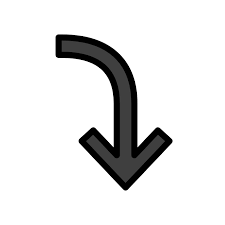

In [4]:
import praw
import pandas as pd
from datetime import datetime

# Reddit API client
reddit = praw.Reddit(
    client_id='f6MuemGIIpuv8csr3CpuzQ',
    client_secret='rSPUbtIsCzfYWW3Lf9mnR330gX7FCA',
    user_agent='USAID-Ke-Prac'
)

# Added more subreddits
keywords = [
    "USAID", "foreign aid", "funding cuts", "aid budget", "Trump Kenya", 
    "USAID Kenya", "cut aid", "budget cuts", "NGO funding", "Africa aid",
    "USAID funding", "foreign aid", "Trump cuts", "USAID money", "aid withdrawal",
    "State Department cuts", "donors","end of USAID","Trump Cuts Aid To Africa","NGOs"
]

relevant_subreddits = ["Kenya","Nairobi"]

# the cutoff date
CUTOFF_DATE = datetime(2025, 1, 1)  

def search_reddit(subreddits, limit=100):
    posts = []
    
    for subreddit_name in subreddits:
        try:
            subreddit = reddit.subreddit(subreddit_name)
            for submission in subreddit.search("USAID OR Kenya OR aid", limit=limit, sort="new"):
                post_date = datetime.utcfromtimestamp(submission.created_utc)
                
                # Skip posts before the cutoff date
                if post_date < CUTOFF_DATE:
                    continue
                
                title_lower = submission.title.lower()
                selftext_lower = submission.selftext.lower()
                matched_keywords = [kw for kw in keywords if kw.lower() in title_lower or kw.lower() in selftext_lower]
                
                if matched_keywords:
                    posts.append({
                        'subreddit': subreddit_name,
                        'keyword': matched_keywords[0],
                        'title': submission.title,
                        'text': submission.selftext,
                        'date_posted': post_date.strftime('%Y-%m-%d %H:%M:%S'),
                        'score': submission.score,
                        'url': submission.url,
                        'permalink': f"https://reddit.com{submission.permalink}",
                        'upvotes': submission.score,
                        'comments': submission.num_comments
                    })
        except Exception as e:
            print(f"Skipped r/{subreddit_name}: {e}")
    
    return pd.DataFrame(posts)

df_reddit = search_reddit(relevant_subreddits, limit=300)
print(f"Found {len(df_reddit)} relevant posts after {CUTOFF_DATE}")
df_reddit.head(50)

Found 3 relevant posts after 2025-01-01 00:00:00


,subreddit,keyword,title,text,date_posted,score,url,permalink,upvotes,comments
0,Kenya,USAID,Filling KRA returns at ksh 35,Usitikie kupata penalty dm usaidike,2025-06-18 05:04:07,1,https://www.reddit.com/r/Kenya/comments/1le8qh...,https://reddit.com/r/Kenya/comments/1le8qhd/fi...,1,2
1,Nairobi,USAID,Theres always someone out there worse off than...,I was talking to my South Sudanese friend yest...,2025-05-12 23:28:50,80,https://www.reddit.com/r/nairobi/comments/1kl7...,https://reddit.com/r/nairobi/comments/1kl7bcm/...,80,53
2,Nairobi,aid withdrawal,What steps are you taking to keep your busines...,"Let's face it, since last year August; a lot o...",2025-04-14 09:54:50,7,https://www.reddit.com/r/nairobi/comments/1jyv...,https://reddit.com/r/nairobi/comments/1jyv2tj/...,7,4


In [5]:
df_reddit.shape

(3, 10)

### Subreddits used Kenya, Nairobi, Africa

Used more keywords i.e  "USAID", "foreign aid", "funding cuts", "aid budget", "Trump Kenya", 
    "USAID Kenya", "cut aid", "budget cuts", "NGO funding", "Africa aid",
    "USAID funding", "foreign aid", "Trump cuts", "USAID money", "aid withdrawal",
    "State Department cuts", "donors", "end of USAID", "Trump Cuts Aid To Africa", "NGOs"
    
    
Subreddits used "Kenya", "Nairobi","Africa" added Africa subreddit to the other subreddits.    

After expanding the list of keywords and subreddits, I was able to collect a larger dataset compared to the initial one, totaling 29 rows and 9 columns. While this marked an improvement in size, the dataset was still too small to support any meaningful analysis. As a result, I further refined the keywords and subreddits more to improve data quality and quantity.

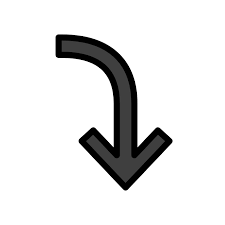

In [6]:
import praw
import pandas as pd
from datetime import datetime

# Reddit API Setup
reddit = praw.Reddit(
    client_id='f6MuemGIIpuv8csr3CpuzQ',
    client_secret='rSPUbtIsCzfYWW3Lf9mnR330gX7FCA',
    user_agent='USAID-Kenya-Aid-Analysis'
)

# Kenya-Specific Keywords
keywords = [
    "USAID", "foreign aid", "funding cuts", "aid budget", "Trump Kenya", 
    "USAID Kenya", "cut aid", "budget cuts", "NGO funding", "Africa aid",
    "USAID funding", "foreign aid", "Trump cuts", "USAID money", "aid withdrawal",
    "State Department cuts", "donors", "end of USAID", "Trump Cuts Aid To Africa", "NGOs"
]

# subreddits
relevant_subreddits = ["Kenya", "Nairobi","Africa"]  

# Cutoff date
CUTOFF_DATE = datetime(2025, 1, 1) 

def search_reddit_kenya(subreddits, limit=100):
    posts = []
    
    for subreddit_name in subreddits:
        try:
            subreddit = reddit.subreddit(subreddit_name)
            # Search for "Kenya + aid" in subreddits
            for submission in subreddit.search("Kenya AND (USAID OR aid OR funding)", limit=limit, sort="new"):
                post_date = datetime.utcfromtimestamp(submission.created_utc)
                
                # Skip posts before the cutoff date
                if post_date < CUTOFF_DATE:
                    continue
                
                # Check for Kenya-specific keywords in title/text
                content = f"{submission.title} {submission.selftext}".lower()
                matched_keywords = [kw for kw in keywords if kw.lower() in content]
                
                if matched_keywords:
                    posts.append({
                        'subreddit': subreddit_name,
                        'keyword': ", ".join(matched_keywords),
                        'title': submission.title,
                        'text': submission.selftext,
                        'date_posted': post_date.strftime('%Y-%m-%d'),
                        'upvotes': submission.score,
                        'comments': submission.num_comments,
                        'url': submission.url,  # Direct URL to linked content
                        'permalink': f"https://reddit.com{submission.permalink}"  # Link to Reddit discussion
                    })
        except Exception as e:
            print(f"Error in r/{subreddit_name}: {e}")
    
    return pd.DataFrame(posts)

# Run search
df_kenya = search_reddit_kenya(relevant_subreddits, limit=200)
print(f"Found {len(df_kenya)} Kenya-focused posts after {CUTOFF_DATE.date()}")



# Save to CSV
if not df_kenya.empty:
    output_filename = f"C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/cecilia.reddit_nbo_ke_africa.csv"
    df_kenya.to_csv(output_filename, index=False, encoding='utf-8')
    print(f"Results saved to {output_filename}")
    
df_kenya.head()    

Found 29 Kenya-focused posts after 2025-01-01
Results saved to C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/cecilia.reddit_nbo_ke_africa.csv


,subreddit,keyword,title,text,date_posted,upvotes,comments,url,permalink
0,Kenya,donors,Dear Gentle Readers,Good morning my gentle readers\n\nToday I have...,2025-05-30,60,74,https://www.reddit.com/r/Kenya/comments/1kyxeb...,https://reddit.com/r/Kenya/comments/1kyxebr/de...
1,Kenya,USAID,USAID Repercussions + Economy,My neighbour’s wife was a very big shot in USA...,2025-05-14,13,33,https://www.reddit.com/r/Kenya/comments/1kmhn8...,https://reddit.com/r/Kenya/comments/1kmhn87/us...
2,Kenya,Trump cuts,Bill Gates 'horrified' by Trump cuts to US aid...,,2025-05-08,1,1,https://www.semafor.com/article/05/08/2025/bil...,https://reddit.com/r/Kenya/comments/1khpakg/bi...
3,Kenya,"foreign aid, foreign aid",Foreign aid/Philanthropy,I see the aid or philanthropic activities that...,2025-04-27,1,0,https://www.reddit.com/r/Kenya/comments/1k91v5...,https://reddit.com/r/Kenya/comments/1k91v58/fo...
4,Kenya,USAID,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,2025-04-15,3,5,https://www.reddit.com/r/Kenya/comments/1jzrn2...,https://reddit.com/r/Kenya/comments/1jzrn2s/us...


In [7]:
df_kenya.shape

(29, 9)

## Subreddits used Kenya,Nairobi,Africa,WorldNews,Geopolitics,InternationalDev, Humanitarian,Development,Politics,AskConservatives and News

Readjusted some keywords and used the following "USAID", "foreign aid", "funding cuts", "aid budget", "Trump Kenya", 
    "USAID Kenya", "cut aid", "budget cuts", "NGO funding", "Africa aid",
    "USAID funding", "foreign aid", "Trump cuts", "USAID money", "aid withdrawal",
    "State Department cuts", "donors", "end of USAID Kenya", "Trump Cuts Aid To Africa", "NGOs","USAID exit Kenya","USAID Repercussions"
    
    
Subreddits used  "Kenya", "Nairobi", "Africa", "worldnews", "geopolitics",
    "InternationalDev", "humanitarian", "globalhealth", "development",'politics','AskConservatives','news'
    
    
After broadening the scope of subreddits and keywords, I was able to collect a significantly larger dataset with 251 rows and 9 columns—providing a more sustainable and reliable foundation for meaningful analysis.

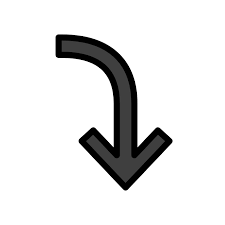

In [8]:
import praw
import pandas as pd
from datetime import datetime

# Reddit API Setup
reddit = praw.Reddit(
    client_id='f6MuemGIIpuv8csr3CpuzQ',
    client_secret='rSPUbtIsCzfYWW3Lf9mnR330gX7FCA',
    user_agent='USAID-Kenya-Aid-Analysis'
)

# Expanded Kenya-Specific Keywords
keywords = [
   "USAID", "foreign aid", "funding cuts", "aid budget", "Trump Kenya", 
    "USAID Kenya", "cut aid", "budget cuts", "NGO funding", "Africa aid",
    "USAID funding", "foreign aid", "Trump cuts", "USAID money", "aid withdrawal",
    "State Department cuts", "donors", "end of USAID Kenya", "Trump Cuts Aid To Africa", "NGOs","USAID exit Kenya","USAID Repercussions"
]
# Expanded subreddits list
relevant_subreddits = [
    "Kenya", "Nairobi", "Africa", "worldnews", "geopolitics",
    "InternationalDev", "humanitarian", "globalhealth", "development",'politics','AskConservatives','news'
]

# cutoff date 
CUTOFF_DATE = datetime(2025, 1, 1)  

def search_reddit_kenya(subreddits, limit=100):
    posts = []
    
    for subreddit_name in subreddits:
        try:
            print(f"Searching r/{subreddit_name}...")
            subreddit = reddit.subreddit(subreddit_name)
            
            # search queries
            search_queries = [
                "Kenya AND (USAID OR aid OR funding)",
                "Kenya AND (development OR assistance)",
                "USAID Kenya",
                "foreign aid Kenya"
            ]
            
            for query in search_queries:
                try:
                    for submission in subreddit.search(query, limit=limit, sort="new"):
                        post_date = datetime.utcfromtimestamp(submission.created_utc)
                        
                        if post_date < CUTOFF_DATE:
                            continue
                            
                        content = f"{submission.title} {submission.selftext}".lower()
                        matched_keywords = [kw for kw in keywords if kw.lower() in content]
                        
                        if matched_keywords:
                            posts.append({
                                'subreddit': subreddit_name,
                                'keyword': ", ".join(matched_keywords),
                                'title': submission.title,
                                'text': submission.selftext,
                                'date_posted': post_date.strftime('%Y-%m-%d'),
                                'upvotes': submission.score,
                                'comments': submission.num_comments,
                                'url': submission.url,
                                'permalink': f"https://reddit.com{submission.permalink}"
                            })
                except Exception as e:
                    print(f"Error with query '{query}' in r/{subreddit_name}: {e}")
                    
        except Exception as e:
            print(f"Error accessing r/{subreddit_name}: {e}")
    
    return pd.DataFrame(posts)

# Run search
print("Starting Reddit search...")
df_kenya2 = search_reddit_kenya(relevant_subreddits, limit=200)

# Print summary
print("\nSearch completed!")
print(f"Found {len(df_kenya2)} Kenya-focused posts after {CUTOFF_DATE.date()}")

# Save to CSV 
if not df_kenya2.empty:
    output_filename = f"C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/cecilia.redditsubs.csv"
    df_kenya2.to_csv(output_filename, index=False, encoding='utf-8')
    print(f"Results saved to {output_filename}")
    

df_kenya2.head()

Starting Reddit search...
Searching r/Kenya...
Searching r/Nairobi...
Searching r/Africa...
Searching r/worldnews...
Searching r/geopolitics...
Searching r/InternationalDev...
Searching r/humanitarian...
Searching r/globalhealth...
Searching r/development...
Searching r/politics...
Searching r/AskConservatives...
Searching r/news...

Search completed!
Found 251 Kenya-focused posts after 2025-01-01
Results saved to C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/cecilia.redditsubs.csv


,subreddit,keyword,title,text,date_posted,upvotes,comments,url,permalink
0,Kenya,donors,Dear Gentle Readers,Good morning my gentle readers\n\nToday I have...,2025-05-30,60,74,https://www.reddit.com/r/Kenya/comments/1kyxeb...,https://reddit.com/r/Kenya/comments/1kyxebr/de...
1,Kenya,"USAID, USAID Repercussions",USAID Repercussions + Economy,My neighbour’s wife was a very big shot in USA...,2025-05-14,13,33,https://www.reddit.com/r/Kenya/comments/1kmhn8...,https://reddit.com/r/Kenya/comments/1kmhn87/us...
2,Kenya,Trump cuts,Bill Gates 'horrified' by Trump cuts to US aid...,,2025-05-08,1,1,https://www.semafor.com/article/05/08/2025/bil...,https://reddit.com/r/Kenya/comments/1khpakg/bi...
3,Kenya,"foreign aid, foreign aid",Foreign aid/Philanthropy,I see the aid or philanthropic activities that...,2025-04-27,1,0,https://www.reddit.com/r/Kenya/comments/1k91v5...,https://reddit.com/r/Kenya/comments/1k91v58/fo...
4,Kenya,USAID,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,2025-04-15,3,5,https://www.reddit.com/r/Kenya/comments/1jzrn2...,https://reddit.com/r/Kenya/comments/1jzrn2s/us...


In [9]:
df_kenya2.shape

(251, 9)

In [10]:
df_kenya2.sample(20)

,subreddit,keyword,title,text,date_posted,upvotes,comments,url,permalink
44,Nairobi,"USAID, USAID money, donors, NGOs",My experience with the USAID Money.,The list of companies who've been getting mone...,2025-02-08,19,13,https://www.reddit.com/r/nairobi/comments/1ikl...,https://reddit.com/r/nairobi/comments/1ikl24v/...
49,Nairobi,"USAID, USAID money, donors, NGOs",My experience with the USAID Money.,The list of companies who've been getting mone...,2025-02-08,20,13,https://www.reddit.com/r/nairobi/comments/1ikl...,https://reddit.com/r/nairobi/comments/1ikl24v/...
170,politics,"foreign aid, foreign aid",‘I am stunned’: Justice Alito slams colleagues...,,2025-03-05,111,46,https://lawandcrime.com/high-profile/i-am-stun...,https://reddit.com/r/politics/comments/1j45hzx...
5,Kenya,USAID,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...,2025-04-07,166,95,https://www.reddit.com/r/Kenya/comments/1jtcvb...,https://reddit.com/r/Kenya/comments/1jtcvbx/cl...
8,Kenya,"foreign aid, foreign aid",Kibaki ALSO failed us,\nThere is a tendency to over-exaggerate the p...,2025-04-01,118,124,https://www.reddit.com/r/Kenya/comments/1jojl2...,https://reddit.com/r/Kenya/comments/1jojl2f/ki...
246,news,"foreign aid, foreign aid",Supreme Court rejects Trump’s request to keep ...,,2025-03-05,22206,542,https://www.cnn.com/2025/03/05/politics/suprem...,https://reddit.com/r/news/comments/1j44611/sup...
36,Kenya,"foreign aid, foreign aid",Is Data the missing link for Kenya's entrepren...,Africa’s economic future is being redefined by...,2025-03-30,2,5,https://www.reddit.com/r/Kenya/comments/1jnfss...,https://reddit.com/r/Kenya/comments/1jnfssf/is...
11,Kenya,USAID,Kenya Kwanza,There's this video on YouTube https://youtu.be...,2025-03-20,0,1,https://www.reddit.com/r/Kenya/comments/1jfjh3...,https://reddit.com/r/Kenya/comments/1jfjh3u/ke...
79,geopolitics,"foreign aid, foreign aid",The Geopolitics of Tariffs,Thoughts on this? I think the article is overa...,2025-04-10,8,1,https://geopoliticalfutures.com/the-geopolitic...,https://reddit.com/r/geopolitics/comments/1jw5...
1,Kenya,"USAID, USAID Repercussions",USAID Repercussions + Economy,My neighbour’s wife was a very big shot in USA...,2025-05-14,13,33,https://www.reddit.com/r/Kenya/comments/1kmhn8...,https://reddit.com/r/Kenya/comments/1kmhn87/us...


## Extracting Data From News API (NewsAPI.org)

In [11]:
!pip install requests



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(s

In [12]:
import requests
import pandas as pd
import time

# My NewsAPI key
API_KEY = 'e11a1726c9c1470ea9abc0eead154d6c'

# Base URL
BASE_URL = 'https://newsapi.org/v2/everything'

# Keywords to search
keywords = [
    "USAID", "foreign aid", "funding cuts", "aid budget", "Trump Kenya",
    "USAID Kenya", "cut aid", "budget cuts", "NGO funding", "Africa aid",
    "USAID funding", "foreign aid", "Trump cuts", "USAID money", "aid withdrawal",
    "State Department cuts", "donors", "end of USAID", "Trump Cuts Aid To Africa", "NGOs"
]


all_articles = []

# Loop through each keyword
for keyword in keywords:
    print(f"Fetching articles for: {keyword}")
    
    params = {
        'q': keyword,
        'apiKey': API_KEY,
        'language': 'en',
        'sortBy': 'relevancy',
        'pageSize': 100,
    }

    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        articles = response.json().get('articles', [])
        for article in articles:
            all_articles.append({
                'keyword': keyword,
                'source': article['source']['name'],
                'title': article['title'],
                'description': article['description'],
                'url': article['url'],
                'publishedAt': article['publishedAt']
            })
    else:
        print(f"Error for keyword '{keyword}':", response.status_code, response.text)
    
    # To avoid rate limiting
    time.sleep(1.5)

# Convert to DataFrame
df = pd.DataFrame(all_articles)
df.sample (50)

Fetching articles for: USAID
Fetching articles for: foreign aid
Fetching articles for: funding cuts
Fetching articles for: aid budget
Fetching articles for: Trump Kenya
Fetching articles for: USAID Kenya
Fetching articles for: cut aid
Fetching articles for: budget cuts
Fetching articles for: NGO funding
Fetching articles for: Africa aid
Fetching articles for: USAID funding
Fetching articles for: foreign aid
Fetching articles for: Trump cuts
Fetching articles for: USAID money
Fetching articles for: aid withdrawal
Fetching articles for: State Department cuts
Fetching articles for: donors
Fetching articles for: end of USAID
Fetching articles for: Trump Cuts Aid To Africa
Fetching articles for: NGOs


,keyword,source,title,description,url,publishedAt
1187,USAID money,The Daily Caller,Former USAID-Funded Program Contractor Sentenc...,A former contractor for a program funded by th...,https://dailycaller.com/2025/05/21/usaid-steph...,2025-05-21T18:15:45Z
1269,aid withdrawal,CBC News,"Israeli forces halt Gaza-bound aid boat, detai...",A Gaza-bound aid boat carrying Greta Thunberg ...,https://www.cbc.ca/news/world/israel-freedom-f...,2025-06-09T02:38:37Z
268,funding cuts,Theregister.com,Dems demand audit of CVE program as Federal fu...,PLUS: Discord invite links may not be safe; Mi...,https://www.theregister.com/2025/06/15/cyberse...,2025-06-15T22:01:06Z
173,foreign aid,Al Jazeera English,"Israeli gunfire, strikes kill 120 Palestinians...",Palestinian death toll in Israel's genocidal w...,https://www.aljazeera.com/news/2025/6/11/israe...,2025-06-11T20:53:00Z
434,Trump Kenya,RT,"It’s 2025, but Africans are still in chains. Why?","As Gaddafi’s last spokesperson, I saw what rea...",https://www.rt.com/africa/618156-truth-behind-...,2025-05-26T12:23:41Z
1045,foreign aid,Deadline,House Committee Advances Bill To Rescind Fundi...,A bill that would claw back $1.1 billion in fe...,http://deadline.com/2025/06/pbs-npr-funding-re...,2025-06-10T23:01:04Z
873,USAID funding,Business Insider,Google Search's AI era comes into focus,Google Search is getting an AI-powered makeove...,https://www.businessinsider.com/google-search-...,2025-05-21T13:15:14Z
1183,USAID money,Vox,Bill Gates shows what the end of perpetual phi...,"For the last quarter-century, Bill Gates has b...",https://www.vox.com/future-perfect/414135/bill...,2025-05-22T21:43:40Z
611,budget cuts,BBC News,Rayner refuses to confirm if two-child benefit...,It follows reports that Sir Keir Starmer had i...,https://www.bbc.com/news/articles/c1kvw39yv1mo,2025-05-25T10:03:19Z
1109,Trump cuts,ABC News,Trump ramps up criticism of Republican senator...,Trump is ramping up his criticism of GOP senat...,https://abcnews.go.com/Politics/trump-ramps-cr...,2025-06-03T14:54:12Z


In [13]:
df.shape

(1800, 6)

In [14]:
# Save to CSV 
if not df.empty:
    output_filename = f"C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/cecilia.newsapi.csv"
    df.to_csv(output_filename, index=False, encoding='utf-8')
    print(f"Results saved to {output_filename}")
    

Results saved to C:/Users/hp/Desktop/DATA NEXUS PROJECTS/USAID-Kenya-Sentiment-Analysis/data/raw/cecilia.newsapi.csv
